In [225]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df1 = pd.read_excel("C:\\Users\\srikanth\\Documents\\SpringBoard\\Projects\\Chemical healt effects & toxicities\\Toxic_Blended_Flattened_Boolean.xlsx")
df1.head(5)


,tox_cas_edf_id,tox_chemical_name,tox_category,tox_cancer,tox_cardiovascular_blood,tox_developmental,tox_endocrine,tox_gastrointestinal_liver,tox_immunotoxicity,tox_kidney,tox_musculoskeletal,tox_neurotoxicity,tox_reproductive,tox_respiratory,tox_skin_sense
0,100-00-5,P-NITROCHLOROBENZENE,recognized,True,False,False,False,False,False,False,False,False,False,False,False
1,100-00-5,P-NITROCHLOROBENZENE,suspected,False,True,False,False,True,False,True,False,False,False,False,False
2,100-01-6,P-NITROANILINE,suspected,False,True,False,False,False,False,False,False,True,False,False,False
3,100-02-7,4-NITROPHENOL,suspected,False,True,False,False,False,False,False,False,True,False,False,True
4,100-20-9,"1,4-BENZENEDICARBONYL CHLORIDE",suspected,False,False,False,False,False,False,False,False,True,False,True,False


In [6]:
list(df1.columns.values)
df1mod = pd.concat([df1.iloc[:,0:3],df1[list(df1.columns.values)[3:]]*1],axis=1)
df1mod.head(5)

,tox_cas_edf_id,tox_chemical_name,tox_category,tox_cancer,tox_cardiovascular_blood,tox_developmental,tox_endocrine,tox_gastrointestinal_liver,tox_immunotoxicity,tox_kidney,tox_musculoskeletal,tox_neurotoxicity,tox_reproductive,tox_respiratory,tox_skin_sense
0,100-00-5,P-NITROCHLOROBENZENE,recognized,1,0,0,0,0,0,0,0,0,0,0,0
1,100-00-5,P-NITROCHLOROBENZENE,suspected,0,1,0,0,1,0,1,0,0,0,0,0
2,100-01-6,P-NITROANILINE,suspected,0,1,0,0,0,0,0,0,1,0,0,0
3,100-02-7,4-NITROPHENOL,suspected,0,1,0,0,0,0,0,0,1,0,0,1
4,100-20-9,"1,4-BENZENEDICARBONYL CHLORIDE",suspected,0,0,0,0,0,0,0,0,1,0,1,0


In [188]:
totcancer=sum(df1mod['tox_cancer'])
tot_card = sum(df1mod['tox_cardiovascular_blood'])
tot_developmental =  sum(df1mod['tox_developmental'])
tot_endocrine = sum(df1mod['tox_endocrine'])
tot_liver = sum(df1mod['tox_gastrointestinal_liver'])
tot_immu = sum(df1mod['tox_immunotoxicity'])
tot_kidney = sum(df1mod['tox_kidney'])
tot_musco = sum(df1mod['tox_musculoskeletal'])
tot_neurotoxicity = sum(df1mod['tox_neurotoxicity'])
tot_reproductive = sum(df1mod['tox_reproductive'])
tot_respiratory  = sum(df1mod['tox_respiratory'])
tot_skin = sum(df1mod['tox_skin_sense'])
tot_toxicity = {'tox_cancer':totcancer,'tox_cardiovascular_blood':tot_card,'tox_developmental':tot_developmental,'tox_endocrine':tot_endocrine,
                'tox_gastrointestinal_liver':tot_liver, 'tox_immunotoxicity':tot_immu, 'tox_kidney': tot_kidney,
                'tox_musculoskeletal':tot_musco, 'tox_neurotoxicity':tot_neurotoxicity, 'tox_reproductive':tot_reproductive,
               'tox_respiratory':tot_respiratory,'tox_skin_sense':tot_skin}
tot_toxicity

{'tox_cancer': 1583,
 'tox_cardiovascular_blood': 675,
 'tox_developmental': 799,
 'tox_endocrine': 310,
 'tox_gastrointestinal_liver': 904,
 'tox_immunotoxicity': 424,
 'tox_kidney': 452,
 'tox_musculoskeletal': 34,
 'tox_neurotoxicity': 1177,
 'tox_reproductive': 354,
 'tox_respiratory': 850,
 'tox_skin_sense': 867}

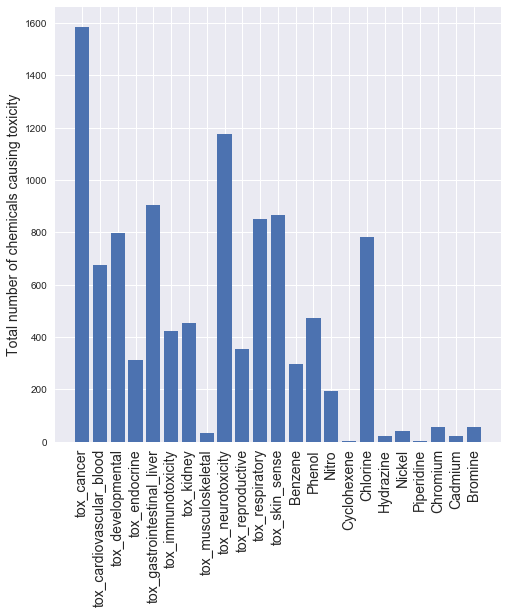

In [293]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
plt.bar(range(len(tot_toxicity)), list(tot_toxicity.values()))
plt.xticks(range(len(tot_toxicity)), list(tot_toxicity.keys()))
plt.xticks(rotation='vertical', fontsize=14)
plt.ylabel('Total number of chemicals causing toxicity', fontsize=14)
plt.show()

In [30]:
df1mod.tox_chemical_name.value_counts()


P-NITROCHLOROBENZENE                                                    2
BERYLLIUM SULFATE                                                       2
NIRIDAZOLE                                                              2
C.I. SOLVENT YELLOW 3                                                   2
NICKEL (II) HYDROXIDE                                                   2
1-(2-CHLOROETHYL)-3-(4-METHYLCYCLOHEXYL)-1-NITROSOUREA (METHYL CCNU)    2
COLCHICINE                                                              2
INORGANIC LEAD COMPOUNDS                                                2
VINYL CHLORIDE                                                          2
TETRACYCLINE HYDROCHLORIDE                                              2
N-NITROSODIETHANOLAMINE                                                 2
1,3-DIBROMO-2,2-DIMETHYLOLPROPANE                                       2
TRP-P-2 (TRYPTOPHAN-P-2)                                                2
N-NITROSODIETHYLAMINE                 

In [31]:
df1mod.shape[0]

3998

In [38]:
len(df1mod.tox_chemical_name.unique())

3409

In [41]:
# check for benzene ring
def benz(chem):
    if 'ben' in chem.lower():
        return(1)
    else:
        return(0)

# check for phenol
def phen(chem1):
    if 'phen' in chem1.lower():
        return(1)
    else:
        return(0)
    
# check for nitro
def nitr(chem2):
    if 'nitro' in chem2.lower():
        return(1)
    else:
        return(0)

# check for cyclohexene
def cycl(chem3):
    if 'cyclohexene' in chem3.lower():
        return(1)
    else:
        return(0)

# check for chlorine
def chl(chem4):
    if 'chlor' in chem4.lower():
        return(1)
    else:
        return(0)
    
# check for HYDRAZINE
def hyd(chem5):
    if 'hydrazine' in chem5.lower():
        return(1)
    else:
        return(0)
    
# check for nickel
def nic(chem6):
    if 'nickel'in chem6.lower():
        return(1)
    else:
        return(0)
    
# check for PIPERIDINE
def pip(chem7):
    if 'piperidine'in chem7.lower():
        return(1)
    else:
        return(0)
    
# check for chromium
def chro(chem8):
    if 'chrom' in chem8.lower():
        return(1)
    else:
        return(0)
    
# check for cadmium
def cad(chem9):
    if 'cadm' in chem9.lower():
        return(1)
    else:
        return(0)
    
# check for bromine
def bro(chem11):
    if 'bromo' in chem11.lower():
        return(1)
    else:
        return(0)
        

#apply
df1mod['Benzene'] = df1mod['tox_chemical_name'].apply(benz)
df1mod['Phenol'] = df1mod['tox_chemical_name'].apply(phen)
df1mod['Nitro'] = df1mod['tox_chemical_name'].apply(nitr)
df1mod['Cyclohexene'] = df1mod['tox_chemical_name'].apply(cycl)
df1mod['Chlorine'] = df1mod['tox_chemical_name'].apply(chl)
df1mod['Hydrazine'] = df1mod['tox_chemical_name'].apply(hyd)
df1mod['Nickel'] = df1mod['tox_chemical_name'].apply(nic)
df1mod['Piperidine'] = df1mod['tox_chemical_name'].apply(pip)
df1mod['Chromium'] = df1mod['tox_chemical_name'].apply(chro)
df1mod['Cadmium'] = df1mod['tox_chemical_name'].apply(cad)
df1mod['Bromine'] = df1mod['tox_chemical_name'].apply(bro)
df1mod.head(5)

,tox_cas_edf_id,tox_chemical_name,tox_category,tox_cancer,tox_cardiovascular_blood,tox_developmental,tox_endocrine,tox_gastrointestinal_liver,tox_immunotoxicity,tox_kidney,...,Phenol,Nitro,Cyclohexene,Chlorine,Hydrazine,Nickel,Piperidine,Chromium,Cadmium,Bromine
0,100-00-5,P-NITROCHLOROBENZENE,recognized,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,100-00-5,P-NITROCHLOROBENZENE,suspected,0,1,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
2,100-01-6,P-NITROANILINE,suspected,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,100-02-7,4-NITROPHENOL,suspected,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,100-20-9,"1,4-BENZENEDICARBONYL CHLORIDE",suspected,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [253]:
tot_benzene=sum(df1mod['Benzene'])
tot_phenol=sum(df1mod['Phenol'])
tot_Nitro = sum(df1mod['Nitro'])
tot_cyclohexene=sum(df1mod['Cyclohexene'])
tot_chlorine =sum(df1mod['Chlorine']) 
tot_hydrazine = sum(df1mod['Hydrazine']) 
tot_Nickel = sum(df1mod['Nickel'])
tot_Piperidine = sum(df1mod['Piperidine'])
tot_Chromium = sum(df1mod['Chromium'])
tot_Cadmium = sum(df1mod['Cadmium'])
tot_Bromine = sum(df1mod['Bromine'])
tot_chemicals={}
tot_chemicals.update({'Benzene':tot_benzene, 'Phenol': tot_phenol, 'Nitro':tot_Nitro, 'Cyclohexene': tot_cyclohexene,
                   'Chlorine':tot_chlorine, 'Hydrazine':tot_hydrazine, 'Nickel': tot_Nickel, 'Piperidine':tot_Piperidine,
                     'Chromium':tot_Chromium, 'Cadmium':tot_Cadmium, 'Bromine': tot_Bromine})

#c = df1mod[(df1mod.tox_cancer == 1) & (df1mod.Benzene == 1)]
#c.groupby(['tox_cancer', 'Benzene']).size()
diseases=list(df1mod.columns.values[3:15])
diseases

['tox_cancer',
 'tox_cardiovascular_blood',
 'tox_developmental',
 'tox_endocrine',
 'tox_gastrointestinal_liver',
 'tox_immunotoxicity',
 'tox_kidney',
 'tox_musculoskeletal',
 'tox_neurotoxicity',
 'tox_reproductive',
 'tox_respiratory',
 'tox_skin_sense']

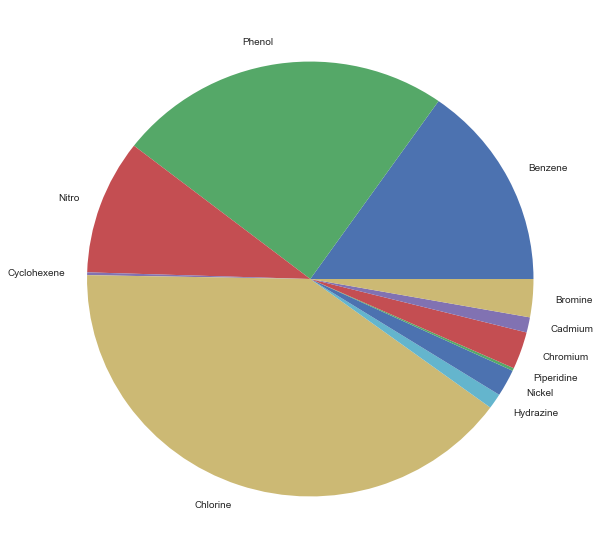

In [296]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
plt.pie(list(tot_chemicals.values()), labels=list(tot_chemicals.keys()))
#plt.xticks(range(len(tot_toxicity)), list(tot_toxicity.keys()))
#plt.xticks(rotation='vertical')
#plt.ylabel('Total number of chemicals causing toxicity')
plt.show()

In [163]:
cancer_chemicals = {}
cardiovascularblood_chemicals = {}
developmental_chemicals = {}
endocrine_chemicals = {}
gastrointestinalliver_chemicals = {}
immunotoxicity_chemicals = {}
kidney_chemicals = {}
musculoskeletal_chemicals = {}
neurotoxicity_chemicals = {}
reproductive_chemicals={}
respiratory_chemicals={}
skin_chemicals={}

for i in range(0, len(basic_chemicals)):
    cancer_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_cancer == 1)][basic_chemicals[i]])})
    cardiovascularblood_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_cardiovascular_blood == 1)][basic_chemicals[i]])})
    developmental_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_developmental == 1)][basic_chemicals[i]])})
    endocrine_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_endocrine == 1)][basic_chemicals[i]])})
    gastrointestinalliver_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_gastrointestinal_liver == 1)][basic_chemicals[i]])})
    immunotoxicity_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_immunotoxicity == 1)][basic_chemicals[i]])})
    kidney_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_kidney == 1)][basic_chemicals[i]])})
    musculoskeletal_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_musculoskeletal == 1)][basic_chemicals[i]])})
    neurotoxicity_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_neurotoxicity == 1)][basic_chemicals[i]])})
    reproductive_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_reproductive == 1)][basic_chemicals[i]])})
    respiratory_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_respiratory == 1)][basic_chemicals[i]])})
    skin_chemicals.update({basic_chemicals[i]:sum(df1mod[(df1mod.tox_skin_sense == 1)][basic_chemicals[i]])})   

reproductive_chemicals

{'Benzene': 18,
 'Bromine': 5,
 'Cadmium': 2,
 'Chlorine': 53,
 'Chromium': 6,
 'Cyclohexene': 1,
 'Hydrazine': 1,
 'Nickel': 4,
 'Nitro': 25,
 'Phenol': 13,
 'Piperidine': 0}

In [230]:
cardiovascularblood_chemicals

{'Benzene': 55,
 'Bromine': 7,
 'Cadmium': 4,
 'Chlorine': 136,
 'Chromium': 3,
 'Cyclohexene': 0,
 'Hydrazine': 8,
 'Nickel': 4,
 'Nitro': 49,
 'Phenol': 48,
 'Piperidine': 1}

In [263]:
#df3 = (list(cancer_chemicals.values()), list(cardiovascularblood_chemicals.values()),list(developmental_chemicals.values()),
#        list( endocrine_chemicals.values()), list(gastrointestinalliver_chemicals.values()), list(immunotoxicity_chemicals.values()),
#     list(kidney_chemicals.values()), list(musculoskeletal_chemicals.values()),list(neurotoxicity_chemicals.values()), list(reproductive_chemicals.values()),       list(respiratory_chemicals.values()), list(skin_chemicals.values()))
#labels = basic_chemicals      
dict2 = [cancer_chemicals, cardiovascularblood_chemicals, developmental_chemicals, endocrine_chemicals, gastrointestinalliver_chemicals,
       immunotoxicity_chemicals, kidney_chemicals, musculoskeletal_chemicals, neurotoxicity_chemicals, reproductive_chemicals,
      respiratory_chemicals, skin_chemicals]
df2 = pd.DataFrame(dict2, index=diseases, columns = basic_chemicals)
df2

,Benzene,Phenol,Nitro,Cyclohexene,Chlorine,Hydrazine,Nickel,Piperidine,Chromium,Cadmium,Bromine
tox_cancer,102,279,97,1,400,11,26,1,33,15,15
tox_cardiovascular_blood,55,48,49,0,136,8,4,1,3,4,7
tox_developmental,26,243,15,0,297,1,4,0,5,3,11
tox_endocrine,39,47,7,0,71,1,1,0,0,2,6
tox_gastrointestinal_liver,67,72,60,1,163,7,1,2,4,4,17
tox_immunotoxicity,32,34,9,1,48,3,9,0,17,1,2
tox_kidney,28,34,21,1,81,2,1,1,9,6,10
tox_musculoskeletal,1,2,0,0,5,0,0,0,0,0,0
tox_neurotoxicity,100,82,49,2,199,7,3,0,2,3,21
tox_reproductive,18,13,25,1,53,1,4,0,6,2,5


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5]), <a list of 12 Text yticklabel objects>)

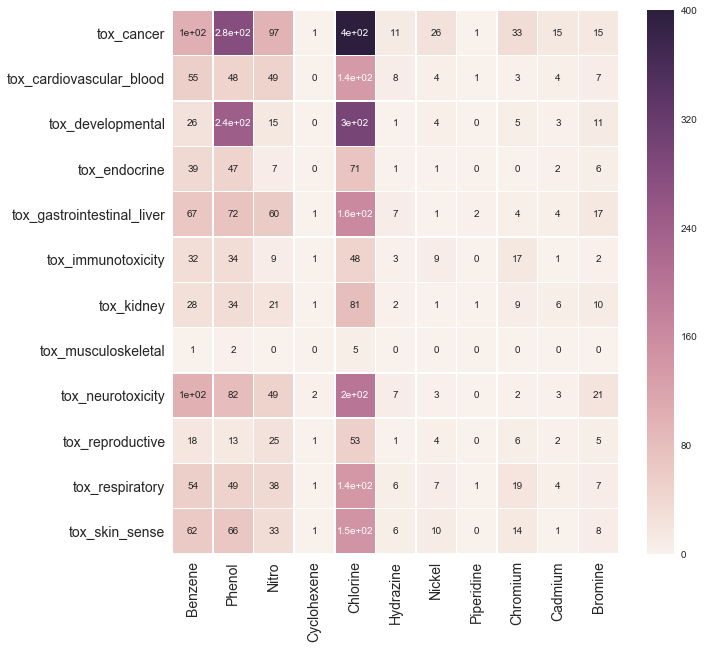

In [283]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df2, annot=True, linewidth=0.5)
plt.xticks(fontsize=14, rotation='vertical')
plt.yticks(fontsize=14)
